In [ ]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
cifar10_test = pd.read_csv('/content/drive/MyDrive/LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')
cifar10_train = pd.read_csv('/content/drive/MyDrive/LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')

In [ ]:
cifar10_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [ ]:
cifar10_test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6


In [ ]:
x_train = cifar10_train.drop('label', axis=1)
y_train = cifar10_train['label']

In [ ]:
x_test = cifar10_test.drop('label', axis=1)
y_test = cifar10_test['label']

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

In [ ]:

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,522 (689.54 KB)

 Trainable params: 176,522 (689.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(x_train.shape,"\n")
print(y_train.shape,"\n")
print(x_test.shape,"\n")
print(y_test.shape,"\n")

(50000, 32, 32, 3) 

(50000,) 

(10000, 32, 32, 3) 

(10000,) 



In [ ]:
h = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.5373 - loss: 1.2917 - val_accuracy: 0.6234 - val_loss: 1.0807
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6352 - loss: 1.0417 - val_accuracy: 0.6450 - val_loss: 1.0213
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.6750 - loss: 0.9263 - val_accuracy: 0.6688 - val_loss: 0.9561
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7089 - loss: 0.8358 - val_accuracy: 0.6730 - val_loss: 0.9516
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7309 - loss: 0.7635 - val_accuracy: 0.6764 - val_loss: 0.9365


In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Test Accuracy: ",test_acc)
print("Test Loss: ",test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6819 - loss: 0.9255
Test Accuracy:  0.6764000058174133
Test Loss:  0.9365266561508179


Text(0.5, 0, 'Epoch')

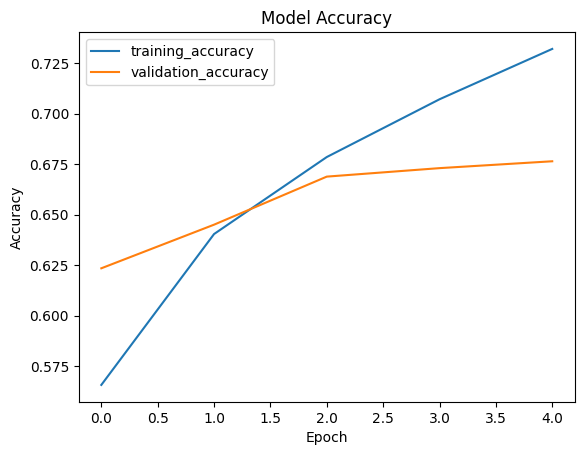

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'],label='training_accuracy')
plt.plot(h.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Predicted Class:  3
Actual Class:  3


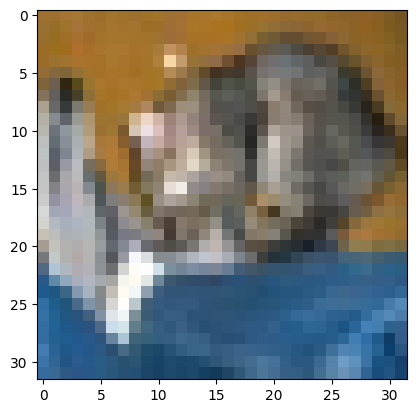

In [ ]:
pred = model.predict(x_test)

pred_classes = np.argmax(pred,axis=1)


plt.imshow(x_test[0])
print("Predicted Class: ",pred_classes[0])
print("Actual Class: ",y_test[0])